<a href="https://colab.research.google.com/github/Junot974/BackTest/blob/main/BackTest_Cross_EMA_%26_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install python-binance

In [13]:
pip install ta

In [14]:
pip install pandas_ta

In [15]:
import pandas as pd
from binance.client import Client
import ta
import pandas_ta as pda
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

client = Client()

klinesT = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1HOUR, "01 january 2021")

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
print(df)

# ----- Functions Definition -------
def get_chop(high, low, close, window):
    tr1 = pd.DataFrame(high - low).rename(columns = {0:'tr1'})
    tr2 = pd.DataFrame(abs(high - close.shift(1))).rename(columns = {0:'tr2'})
    tr3 = pd.DataFrame(abs(low - close.shift(1))).rename(columns = {0:'tr3'})
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').dropna().max(axis = 1)
    atr = tr.rolling(1).mean()
    highh = high.rolling(window).max()
    lowl = low.rolling(window).min()
    ci = 100 * np.log10((atr.rolling(window).sum()) / (highh - lowl)) / np.log10(window)
    return ci


                        open     high  ...         tb_quote_av  ignore
timestamp                              ...                            
2021-01-01 00:00:00   736.42   739.00  ...   11015918.97221470       0
2021-01-01 01:00:00   734.08   749.00  ...   20362373.93350290       0
2021-01-01 02:00:00   748.27   749.00  ...   13207123.35208410       0
2021-01-01 03:00:00   744.06   747.23  ...    7079926.31087480       0
2021-01-01 04:00:00   744.87   747.09  ...    7539500.28687210       0
...                      ...      ...  ...                 ...     ...
2021-11-20 15:00:00  4286.23  4290.50  ...   75648601.16662200       0
2021-11-20 16:00:00  4213.05  4245.24  ...   50747638.55337600       0
2021-11-20 17:00:00  4243.15  4254.01  ...   21218947.90164500       0
2021-11-20 18:00:00  4251.45  4392.39  ...  139392623.55264000       0
2021-11-20 19:00:00  4369.74  4389.00  ...   16229363.34870400       0

[7759 rows x 11 columns]


In [28]:
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)

#Simple Moving Average
# df['SMA']=ta.trend.sma_indicator(df['close'], window=12)

#Exponential Moving Average
df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=28)
df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=48)

# #Relative Strength Index (RSI)
# df['RSI'] =ta.momentum.rsi(close=df['close'], window=14)

# #MACD
# MACD = ta.trend.MACD(close=df['close'], window_fast=12, window_slow=26, window_sign=9)
# df['MACD'] = MACD.macd()
# df['MACD_SIGNAL'] = MACD.macd_signal()
# df['MACD_DIFF'] = MACD.macd_diff() #Histogramme MACD

# #Stochastic RSI
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3) #Non moyenné 
#df['STOCH_RSI_D'] = ta.momentum.stochrsi_d(close=df['close'], window=14, smooth1=3, smooth2=3) #Orange sur TradingView
#df['STOCH_RSI_K'] =ta.momentum.stochrsi_k(close=df['close'], window=14, smooth1=3, smooth2=3) #Bleu sur TradingView

# #Ichimoku
# df['KIJUN'] = ta.trend.ichimoku_base_line(high=df['high'], low=df['low'], window1=9, window2=26)
# df['TENKAN'] = ta.trend.ichimoku_conversion_line(high=df['high'], low=df['low'], window1=9, window2=26)
# df['SSA'] = ta.trend.ichimoku_a(high=df['high'], low=df['low'], window1=9, window2=26)
# df['SSB'] = ta.trend.ichimoku_b(high=df['high'], low=df['low'], window2=26, window3=52)

# #Bollinger Bands
# BOL_BAND = ta.volatility.BollingerBands(close=df['close'], window=20, window_dev=2)
# df['BOL_H_BAND'] = BOL_BAND.bollinger_hband() #Bande Supérieur
# df['BOL_L_BAND'] = BOL_BAND.bollinger_lband() #Bande inférieur
# df['BOL_MAVG_BAND'] = BOL_BAND.bollinger_mavg() #Bande moyenne

# #Average True Range (ATR)
# df['ATR'] = ta.volatility.average_true_range(high=df['high'], low=df['low'], close=df['close'], window=14)

# #Super Trend
# ST_length = 10
# ST_multiplier = 3.0
# superTrend = pda.supertrend(high=df['high'], low=df['low'], close=df['close'], length=ST_length, multiplier=ST_multiplier)
# df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)] #Valeur de la super trend
# df['SUPER_TREND_DIRECTION'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)] #Retourne 1 si vert et -1 si rouge

# #Awesome Oscillator
# df['AWESOME_OSCILLATOR'] = ta.momentum.awesome_oscillator(high=df['high'], low=df['low'], window1=5, window2=34)

# # Kaufman’s Adaptive Moving Average (KAMA)
# df['KAMA'] = ta.momentum.kama(close=df['close'], window=10, pow1=2, pow2=30)

# #Choppiness index
# df['CHOP'] = get_chop(high=df['high'], low=df['low'], close=df['close'], window=14)  

df

,open,high,low,close,volume,EMA1,EMA2,STOCH_RSI
timestamp,,,,,,,,
2021-01-01 00:00:00,736.42,739.00,729.33,734.07,27932.69884000,NaN,NaN,NaN
2021-01-01 01:00:00,734.08,749.00,733.37,748.28,52336.18779000,NaN,NaN,NaN
2021-01-01 02:00:00,748.27,749.00,742.27,744.06,33019.50100000,NaN,NaN,NaN
2021-01-01 03:00:00,744.06,747.23,743.10,744.82,17604.80859000,NaN,NaN,NaN
2021-01-01 04:00:00,744.87,747.09,739.30,742.29,18794.15424000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-20 15:00:00,4286.23,4290.50,4211.38,4213.06,37492.20860000,4257.833980,4238.254060,0.000000
2021-11-20 16:00:00,4213.05,4245.24,4199.86,4243.15,23157.30180000,4256.821291,4238.453895,0.265088
2021-11-20 17:00:00,4243.15,4254.01,4226.30,4251.45,9875.14210000,4256.450858,4238.984348,0.333580


Period : [2021-01-01 00:00:00] -> [2021-11-20 19:00:00]
Starting balance : 1000 $
Final balance : 3739.34 $
Performance vs US Dollar : 273.93 %
Buy and Hold Performence : 496.75 %
Performance vs Buy and Hold : -44.86 %
Number of negative trades :  30
Number of positive trades :  24
Average Positive Trades :  11.63 %
Average Negative Trades :  -3.62 %
Best trade +63.47 %, the  2021-05-13 05:00:00
Worst trade -8.65 %, the  2021-06-25 18:00:00
Worst drawBack -31.0 %
Total fee :  116.01 $
PLOT


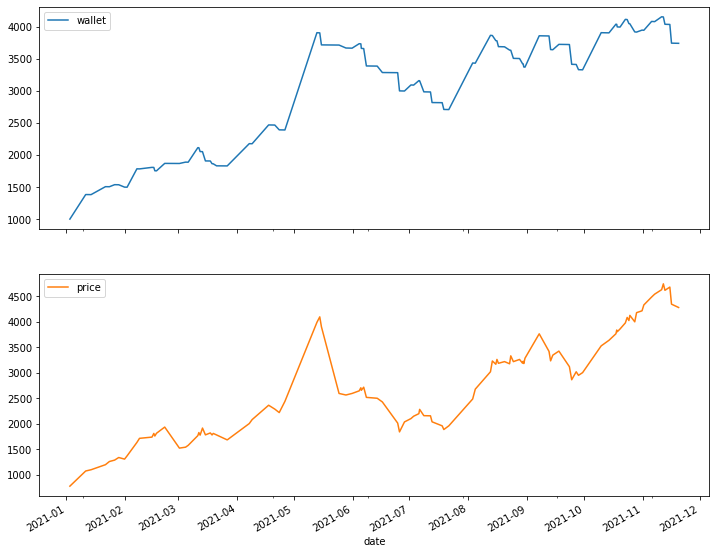

In [32]:
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastIndex = df.first_valid_index()
fee = 0.0007

for index, row in dfTest.iterrows():
  #Buy
  if row['EMA1'] > row['EMA2'] and row['STOCH_RSI'] < 0.8 and  usdt > 0:

    #Define stoploss and takeProfit
    #stopLoss =  - 0.02 * buyPrice
    #takeProfit = buyPrice + O.1 * buyPrice


    coin = usdt / row['close']
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",df['close'][index],'$ the', index)
    myrow = {'date': index,'position': "Buy",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)

  #Sell
  if row['EMA1'] < row['EMA2'] and row['STOCH_RSI'] > 0.2 and coin > 0:
    usdt = coin * row['close']
    frais = fee * usdt
    usdt = usdt - frais
    coin = 0
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at",df['close'][index],'$ the', index)
    myrow = {'date': index,'position': "Sell",'price': row['close'],'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  lastIndex = index

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')